Juanita Jovana  | 2206028604

UTS ADTT - Sentimen Analisis

# Scraping
Scraping data dilakukan dengan mengumpukan data ulasan pengguna aplikasi Kopi Kenangan dari Google Play Store menggunakan bantuan dari library google-play-scraper. Data yang diambil berupa nama pemberi ulasan, nilai bintang yang diberikan, waktu ulasan dikirim dan isi review ulasan.

### Library Installation

In [24]:
!pip install google-play-scraper
!pip install Sastrawi

### Import Library

In [25]:
from google_play_scraper import app
import pandas as pd
import numpy as np
from google_play_scraper import Sort, reviews
from pathlib import Path
from datetime import datetime
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Impor pustaka untuk visualisasi
import plotly.express as px
from wordcloud import WordCloud

# Impor pustaka untuk analisis statistik
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px

# Setel opsi tampilan pandas
pd.set_option('display.max_colwidth', None)

# Impor pustaka untuk pra-pemrosesan data dan analisis
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE, KMeansSMOTE
from imblearn.metrics import classification_report_imbalanced

# Impor pustaka untuk model machine learning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# Impor pustaka untuk pemrosesan teks
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [26]:
#  saving dataframe result of scrapping to csv file
def makeCsv(fileName):
    filepath = Path(f'dataset/{fileName}')
    filepath.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(filepath)

In [27]:
result, continuation_token = reviews(
    'com.kopikenangan',
        lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=30000,
    filter_score_with=None
)
df = pd.DataFrame(np.array(result),columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ed6d3957-3a0d-4ee6-83a0-b5d0b1e17bd9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,bagus bgt,5,0,125.04.10,2025-04-26 02:14:18,"Hi Kak Maykel Lubis, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2025-04-26 02:16:50,125.04.10
1,c1e31bc2-f849-4862-9747-90cac7e72f0d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,ok,5,0,125.04.10,2025-04-26 01:46:05,"Hi Kak Muhammad Haris, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2025-04-26 01:47:03,125.04.10
2,7cc96408-b781-44fd-9984-cb8dbc239fbd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,amazing,5,0,125.04.10,2025-04-26 01:41:22,"Hi Kak Rifan Ardiyanto, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2025-04-26 01:43:08,125.04.10
3,088387d6-9c5e-4ee8-a344-6254abd08d2d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,terbaik✨✨,5,0,125.04.10,2025-04-26 01:26:17,"Hi Kak Indah Aprilia, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2025-04-26 01:31:09,125.04.10
4,dd5c1a1a-ce09-4987-a620-3da279883fc3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"bagus tempatnya ,nyaman ,kalo bisa tiap tempat ada musholanya",5,0,124.09.12,2025-04-26 00:13:16,"Hi Kak 108 RAHMAD HAMDANI LUBIS, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2025-04-26 01:00:27,124.09.12
...,...,...,...,...,...,...,...,...,...,...,...
27042,3bc59795-8752-4236-b7c1-a9d4b0649606,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Okeee,5,0,1.0.7,2020-01-16 00:39:31,"Hi beb, terima kasih untuk review yang kamu berikan. Kami akan terus memberikan yang terbaik untuk para mantan ❤️",2020-01-27 07:35:33,1.0.7
27043,f71623d5-2b0c-4fcd-a8ec-0ce70ce4f94a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Oke lah,5,0,1.0.7,2020-01-16 00:18:29,"Hi beb, terima kasih untuk review yang kamu berikan. Kami akan terus memberikan yang terbaik untuk para mantan ❤️",2020-01-27 07:35:27,1.0.7
27044,5618fa23-1ba0-4d19-8888-258c406da214,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Good,5,0,1.0.7,2020-01-16 00:13:47,"Hi beb, terima kasih untuk review yang kamu berikan. Kami akan terus memberikan yang terbaik untuk para mantan ❤️",2020-01-27 07:35:23,1.0.7
27045,44a8b7d8-88ee-470d-936f-c3fb6e1955ae,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Kode referal di input dimana ini hmm tidak ada kolom buat di isi.,3,4,1.0.7,2020-01-15 19:49:06,"Hi beb, mohon maa

In [28]:
from google_play_scraper import reviews, Sort
import pandas as pd
import numpy as np
from datetime import datetime


app_id = 'com.kopikenangan'

# Scraping review
result, continuation_token = reviews(
    app_id,
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=10000,
    filter_score_with=None
)

# Mengonversi hasil ke DataFrame
df = pd.DataFrame(np.array(result), columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))

# Pastikan kolom 'at' bertipe datetime
df['at'] = pd.to_datetime(df['at'])

# Meneentukan rentang tanggal
start_date = datetime(2024, 4, 24)
end_date = datetime(2025, 4, 24)

# Filter review berdasarkan rentang tanggal
df = df[(df['at'] >= start_date) & (df['at'] <= end_date)]

# Tampilkan hasil
print(f"Total review yang diambil dari {start_date.date()} sampai {end_date.date()}: {len(df)}")
df


Total review yang diambil dari 2024-04-24 sampai 2025-04-24: 4215


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
37,262e0e53-b19d-42fc-a7e8-039a7f9ad110,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Pertahankan semua yg terbaik,5,0,125.04.10,2025-04-23 15:37:22,"Hi Kak Rini, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2025-04-24 01:11:08,125.04.10
38,a87aeeb2-7407-4ec7-995e-d088998fc731,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,sudah bayar ongkir malah di auuh ambil ke outlet. parah ndak bisa di calcel pulak,1,0,125.04.10,2025-04-23 14:22:27,"Hi Kak Huda, mohon maaf atas ketidaknyamanannya. Silahkan kirimkan detail kendala yang kakak alami ke email hello@kopikenangan.com atau melalui whatsapp di 08170756865 agar dapat kami bantu tindaklanjuti. Terima kasih🙏🏻",2025-04-24 01:04:57,125.04.10
39,a8ebee91-4c20-4567-9af7-7d456fcfeb67,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"enak tempatnya,buat ngobrol bareng teman juga SM ayang beb,..kopinya juga mantap harga terjangkau,..sukses terus👍🫰",5,0,125.04.10,2025-04-23 13:14:54,"Hi Kak Kantun, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2025-04-24 01:01:51,125.04.10
40,d9ac8d1e-765c-47ea-966a-68edb3e6a70a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"membantu, perbanyak promo",5,0,125.04.10,2025-04-23 13:03:43,"Hi Kak Roy, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2025-04-24 01:02:25,125.04.10
41,c4ab2aec-8245-4452-b829-0913a388864a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Mantap,enak kopinya",5,0,125.03.06,2025-04-23 10:27:45,"Hi Kak Siti, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2025-04-23 10:29:17,125.03.06
...,...,...,...,...,...,...,...,...,...,...,...
4247,21226e1f-4f92-42b9-be66-a24d9c6d7b2a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Pelayanan bagus,5,0,124.04.19,2024-04-24 11:44:55,"Hi Kak Draoxx TM, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2024-04-24 11:47:18,124.04.19
4248,9e79fc46-325e-406b-8b4d-774b88558db9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Mantap,5,0,124.04.19,2024-04-24 10:52:38,"Hi Kak Dwi, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2024-04-24 10:55:15,124.04.19
4249,89aac78d-deeb-421c-9e47-30966deef29e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Keren,5,0,124.02.01,2024-04-24 04:41:05,"Hi Kak Taura, terima kasih atas review baiknya untuk Kopi Ke

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4215 entries, 37 to 4251
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              4215 non-null   object        
 1   userName              4215 non-null   object        
 2   userImage             4215 non-null   object        
 3   content               4215 non-null   object        
 4   score                 4215 non-null   int64         
 5   thumbsUpCount         4215 non-null   int64         
 6   reviewCreatedVersion  3662 non-null   object        
 7   at                    4215 non-null   datetime64[ns]
 8   replyContent          4201 non-null   object        
 9   repliedAt             4201 non-null   datetime64[ns]
 10  appVersion            3662 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 395.2+ KB


In [30]:
app_versions = df['appVersion'].unique()
app_versions

array(['125.04.10', '125.03.06', '124.02.24', '125.03.20', None,
       '124.12.31', '124.09.12', '124.02.13', '125.02.27', '123.11.25',
       '124.07.04', '124.11.21', '124.05.30', '124.12.12', '124.08.29',
       '124.10.24', '124.04.19', '124.05.16', '124.07.18', '122.03.04',
       '124.08.01', '124.08.16', '124.10.13', '123.03.30', '124.02.22',
       '122.01.12', '124.06.20', '123.10.21', '121.12.23', '124.09.20',
       '124.02.01', '123.04.10', '123.12.29', '124.10.10', '123.11.02',
       '124.06.02', '123.08.25', '123.06.08', '124.04.02', '123.1.11',
       '123.12.14', '123.07.14', '124.03.21', '124.03.27', '123.09.26',
       '124.03.07', '123.12.07', '122.11.08', '123.06.09', '121.12.03'],
      dtype=object)

In [31]:
# Ubah kolom 'appVersion' menjadi tipe data string (str)
df['appVersion'] = df['appVersion'].astype(str)

In [32]:
sum(df['appVersion'].str.startswith('124',))

3177

In [33]:
# Filter DataFrame untuk 'appVersion' yang dimulai dengan '124'
df_filt = df[df['appVersion'].str.startswith('124')]

df_filt


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
50,c0ba379d-f06d-415d-bd25-970897c9bea4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,good,5,0,124.02.24,2025-04-23 02:25:31,"Hi Kak Tri, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2025-04-23 02:27:04,124.02.24
111,d91afc66-0ad6-4412-9ee8-4c1a6b4e3c49,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,sangat membantu pemesanan,5,0,124.12.31,2025-04-16 12:08:02,"Hi Kak Yanuar Eka Syaputra, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2025-04-16 12:09:32,124.12.31
117,ad3334b9-8d0b-43bd-869f-11d2eb822478,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,mempermudah order kopi favorite sey....,5,0,124.02.24,2025-04-16 03:54:51,"Hi Kak Dini, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2025-04-16 03:57:08,124.02.24
149,170afcb1-841c-4b92-8cc2-e958c00ca897,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Mempermudah pembelian tanpa antri dan ttp bisa menggunakan promo aplikasi,5,0,124.09.12,2025-04-13 13:57:05,"Hi Kak, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2025-04-14 01:04:30,124.09.12
164,f46a519d-f05a-4915-93cc-c71a9150187e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,bagus banget aplikasinya dan selalu dapat diskon di aplikasi,5,0,124.02.13,2025-04-12 14:28:52,"Hi Kak Ari Prema, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2025-04-13 01:01:48,124.02.13
...,...,...,...,...,...,...,...,...,...,...,...
4247,21226e1f-4f92-42b9-be66-a24d9c6d7b2a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Pelayanan bagus,5,0,124.04.19,2024-04-24 11:44:55,"Hi Kak Draoxx TM, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2024-04-24 11:47:18,124.04.19
4248,9e79fc46-325e-406b-8b4d-774b88558db9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Mantap,5,0,124.04.19,2024-04-24 10:52:38,"Hi Kak Dwi, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman kakak untuk download app kami juga yaa😊",2024-04-24 10:55:15,124.04.19
4249,89aac78d-deeb-421c-9e47-30966deef29e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Keren,5,0,124.02.01,2024-04-24 04:41:05,"Hi Kak Taura, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk

In [34]:
# Menyimpan DataFrame df_filt ke dalam file CSV
df_filt.to_csv('df_filt.csv', index=False)

# Konfirmasi
print("File CSV telah disimpan!")

File CSV telah disimpan!


In [35]:
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3177 entries, 50 to 4251
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              3177 non-null   object        
 1   userName              3177 non-null   object        
 2   userImage             3177 non-null   object        
 3   content               3177 non-null   object        
 4   score                 3177 non-null   int64         
 5   thumbsUpCount         3177 non-null   int64         
 6   reviewCreatedVersion  3177 non-null   object        
 7   at                    3177 non-null   datetime64[ns]
 8   replyContent          3165 non-null   object        
 9   repliedAt             3165 non-null   datetime64[ns]
 10  appVersion            3177 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 297.8+ KB


##Cek Missing Value

In [36]:
df_filt = df_filt.dropna(subset=['content'])

##Cek Duplicate

In [37]:
duplicates = df_filt.duplicated()
num_duplicate = duplicates.sum()
print(f'Jumlah duplikasi dari dataset df_filt: {num_duplicate}')

Jumlah duplikasi dari dataset df_filt: 0


In [38]:
data = df_filt[['userName', 'content', 'score']]
data

,userName,content,score
50,Pengguna Google,good,5
111,Pengguna Google,sangat membantu pemesanan,5
117,Pengguna Google,mempermudah order kopi favorite sey....,5
149,Pengguna Google,Mempermudah pembelian tanpa antri dan ttp bisa menggunakan promo aplikasi,5
164,Pengguna Google,bagus banget aplikasinya dan selalu dapat diskon di aplikasi,5
...,...,...,...
4247,Pengguna Google,Pelayanan bagus,5
4248,Pengguna Google,Mantap,5
4249,Pengguna Google,Keren,5
4250,Pengguna Google,Pokoknya suka kopi kenangan dibanding yg lain,5


In [39]:
# 1. Lowercasing: Ubah semua teks menjadi huruf kecil
data.loc[:, 'content1'] = data['content'].apply(lambda x: x.lower())

data['content'].head(5)

<ipython-input-39-490c0e0f9b6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'content1'] = data['content'].apply(lambda x: x.lower())


,content
50,good
111,sangat membantu pemesanan
117,mempermudah order kopi favorite sey....
149,Mempermudah pembelian tanpa antri dan ttp bisa menggunakan promo aplikasi
164,bagus banget aplikasinya dan selalu dapat diskon di aplikasi


In [40]:
# 2. Text cleaning: Hapus karakter selain huruf dan spasi
data.loc[:,'content2'] = data['content1'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Tampilkan hasil text cleaning
data['content2'].head(5)

<ipython-input-40-2f85854dd31f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'content2'] = data['content1'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))


,content2
50,good
111,sangat membantu pemesanan
117,mempermudah order kopi favorite sey
149,mempermudah pembelian tanpa antri dan ttp bisa menggunakan promo aplikasi
164,bagus banget aplikasinya dan selalu dapat diskon di aplikasi


##Normalization

In [41]:
# 3. Normalisasi bahasa
# Memuat kamus slang Indonesia
indo_slang_word = pd.read_csv("https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv")

def replace_slang_word(doc, slang_word):
    words = word_tokenize(doc)
    for index in range(len(words)):
        index_slang = slang_word.slang == words[index]
        formal = list(set(slang_word[index_slang].formal))
        if len(formal) == 1:
            words[index] = formal[0]
    return ' '.join(words)

# Terapkan fungsi replace_slang_word ke df[content2]
data.loc[:, 'content3'] = data['content2'].apply(lambda x: replace_slang_word(x, indo_slang_word))

<ipython-input-41-fe077b54e3e4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'content3'] = data['content2'].apply(lambda x: replace_slang_word(x, indo_slang_word))


In [42]:
# 4. TMenghapus stopwords
# Mengambil stopwords Bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Fungsi untuk menghapus stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text)  # Tokenisasi teks
    tokens_without_stopwords = [word for word in tokens if word not in stop_words]  # Hapus stopwords
    return ' '.join(tokens_without_stopwords)  # Gabungkan kembali kata-kata yang tersisa

# Terapkan fungsi remove_stopwords ke kolom 'content3'
data.loc[:, 'content4'] = data['content3'].apply(remove_stopwords)

# Tampilkan hasil
data['content4'].head(5)

<ipython-input-42-a9d98235b27b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'content4'] = data['content3'].apply(remove_stopwords)


,content4
50,good
111,membantu pemesanan
117,mempermudah order kopi favorite sih
149,mempermudah pembelian antri promo aplikasi
164,bagus banget aplikasinya diskon aplikasi


In [43]:
# 5. Tokenisasi
import nltk
from nltk.tokenize import word_tokenize

# Pastikan untuk mengunduh 'punkt' jika belum dilakukan
nltk.download('punkt')

# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Terapkan fungsi tokenisasi ke kolom 'content4'
data.loc[:, 'content5'] = data['content4'].apply(tokenize_text)

# Tampilkan hasil tokenisasi
data['content5'].head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-43-717dd5c4aa6e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'content5'] = data['content4'].apply(tokenize_text)


,content5
50,[good]
111,"[membantu, pemesanan]"
117,"[mempermudah, order, kopi, favorite, sih]"
149,"[mempermudah, pembelian, antri, promo, aplikasi]"
164,"[bagus, banget, aplikasinya, diskon, aplikasi]"


In [44]:
# 6. lematisasi
# Inisialisasi stemmer dari Sastrawi (untuk lematisasi)
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan lematisasi pada token
def lemmatize_tokens(tokens):
    # Lakukan lematisasi pada setiap token
    return [stemmer.stem(word) for word in tokens]

# Terapkan lematisasi pada kolom 'content5' (tokenisasi sudah dilakukan sebelumnya)
data.loc[:,'content6'] = data['content5'].apply(lambda tokens: lemmatize_tokens(tokens))

# Tampilkan hasil lematisasi
data['content6'].head(5)

<ipython-input-44-5b3d4ac1217f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'content6'] = data['content5'].apply(lambda tokens: lemmatize_tokens(tokens))


,content6
50,[good]
111,"[bantu, mesan]"
117,"[mudah, order, kopi, favorite, sih]"
149,"[mudah, beli, antri, promo, aplikasi]"
164,"[bagus, banget, aplikasi, diskon, aplikasi]"


In [45]:
# format akhir yang tidak dalam list
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer untuk Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan lematisasi
def lemmatize_text(text):
    # Tokenisasi (memecah teks menjadi kata-kata)
    tokens = word_tokenize(text)

    # Lakukan lematisasi pada setiap kata
    lemmatized_tokens = [stemmer.stem(word) for word in tokens]

    # Gabungkan kembali kata-kata yang telah dilematiskan
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatize_text ke kolom 'content4'
data['content53'] = data['content4'].apply(lemmatize_text)

# Tampilkan hasil
data[['content53']].head(5)

<ipython-input-45-6b4305a1cfaf>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content53'] = data['content4'].apply(lemmatize_text)


,content53
50,good
111,bantu mesan
117,mudah order kopi favorite sih
149,mudah beli antri promo aplikasi
164,bagus banget aplikasi diskon aplikasi


In [46]:
data

,userName,content,score,content1,content2,content3,content4,content5,content6,content53
50,Pengguna Google,good,5,good,good,good,good,[good],[good],good
111,Pengguna Google,sangat membantu pemesanan,5,sangat membantu pemesanan,sangat membantu pemesanan,sangat membantu pemesanan,membantu pemesanan,"[membantu, pemesanan]","[bantu, mesan]",bantu mesan
117,Pengguna Google,mempermudah order kopi favorite sey....,5,mempermudah order kopi favorite sey....,mempermudah order kopi favorite sey,mempermudah order kopi favorite sih,mempermudah order kopi favorite sih,"[mempermudah, order, kopi, favorite, sih]","[mudah, order, kopi, favorite, sih]",mudah order kopi favorite sih
149,Pengguna Google,Mempermudah pembelian tanpa antri dan ttp bisa menggunakan promo aplikasi,5,mempermudah pembelian tanpa antri dan ttp bisa menggunakan promo aplikasi,mempermudah pembelian tanpa antri dan ttp bisa menggunakan promo aplikasi,mempermudah pembelian tanpa antri dan tetap bisa menggunakan promo aplikasi,mempermudah pembelian antri promo aplikasi,"[mempermudah, pembelian, antri, promo, aplikasi]","[mudah, beli, antri, promo, aplikasi]",mudah beli antri promo aplikasi
164,Pengguna Google,bagus banget aplikasinya dan selalu dapat diskon di aplikasi,5,bagus banget aplikasinya dan selalu dapat diskon di aplikasi,bagus banget aplikasinya dan selalu dapat diskon di aplikasi,bagus banget aplikasinya dan selalu dapat diskon di aplikasi,bagus banget aplikasinya diskon aplikasi,"[bagus, banget, aplikasinya, diskon, aplikasi]","[bagus, banget, aplikasi, diskon, aplikasi]",bagus banget aplikasi diskon aplikasi
...,...,...,...,...,...,...,...,...,...,...
4247,Pengguna Google,Pelayanan bagus,5,pelayanan bagus,pelayanan bagus,pelayanan bagus,pelayanan bagus,"[pelayanan, bagus]","[layan, bagus]",layan bagus
4248,Pengguna Google,Mantap,5,mantap,mantap,mantap,mantap,[mantap],[mantap],mantap
4249,Pengguna Google,Keren,5,keren,keren,keren,keren,[keren],[keren],keren
4250,Pengguna Google,Pokoknya suka kopi kenangan dibanding yg lain,5,pokoknya suka kopi kenangan dibanding yg lain,pokoknya suka kopi kenangan dibanding yg lain,pokoknya suka kopi kenangan dibanding yang lain,pokoknya suka kopi kenangan dibanding,"[pokoknya, suka, kopi, kenangan, dibanding]","[pokok, suka, kopi, kenang, banding]",pokok suka kopi kenang banding


In [47]:
unique_versions = data['content53'].unique()

# Menampilkan hasil
print("Nilai Unik dari 'content53':")
print(unique_versions)

Nilai Unik dari 'content53':
['good' 'bantu mesan' 'mudah order kopi favorite sih' ...
 'wow mantap voucher ribu kopi kenang rekening baca bayar uang ongkirnya sisa harga ribu gratis'
 'enak banget diskon' 'pokok suka kopi kenang banding']


In [48]:
# Gabungkan semua teks dalam 'content53' dan lakukan tokenisasi
all_text = ' '.join(data['content53'].dropna())  # Gabungkan semua teks menjadi satu string

# Tokenisasi teks untuk memecahnya menjadi kata
words = word_tokenize(all_text)

# Dapatkan kata unik dengan menggunakan set
unique_words = set(words)

# Tampilkan kata-kata unik
print(f"Total kata unik di content53: {len(unique_words)}")
print(list(unique_words))  # Menampilkan 20 kata pertama yang unik

Total kata unik di content53: 2115
['sukaaaaaaaaaaa', 'mantull', 'es', 'bangsa', 'nomor', 'kotos', 'guna', 'gede', 'derita', 'beans', 'played', 'colok', 'gurih', 'guud', 'sat', 'sumber', 'jumat', 'macha', 'kursi', 'lainhehe', 'mes', 'membantumempermudah', 'mind', 'alami', 'promosaran', 'kesini', 'diskonnyaa', 'frendly', 'padu', 'tetap', 'brew', 'murah', 'promonyamakasih', 'nce', 'promonyaaa', 'pajang', 'diperbaikki', 'terussss', 'manis', 'bikin', 'mantaaaaap', 'tuh', 'ubah', 'kupon', 'promk', 'sehat', 'fresh', 'laku', 'mantaaab', 'cacat', 'simpel', 'beast', 'bohong', 'saldo', 'wajib', 'ngeleg', 'paripurna', 'bukti', 'titip', 'perbanyakin', 'pelayananannya', 'musholla', 'xixixi', 'komen', 'franchise', 'perih', 'non', 'satu', 'mantulmamansentul', 'milknyaaaa', 'mantaaapp', 'daya', 'pegawai', 'kenyang', 'enyak', 'rama', 'rest', 'mangstaps', 'coffe', 'jaga', 'hrga', 'aplikatif', 'kendari', 'kopkenlumayan', 'cirengsaus', 'aga', 'pengin', 'fast', 'magic', 'kendala', 'rasany', 'syegerr', 'gua

In [49]:
!pip install vaderSentiment
# labelling
from nltk.sentiment import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

additional_lexicon_id = {
    'lezat': 1.0,'thankyou': 1.0, 'thebest': 1.0, 'loving': 0.8, 'super': 0.9, 'coffee': 0.8,
    'reommended': 0.8, 'grats': 0.8, 'wow': 0.9, 'maintain': 0.7, 'marketplace': 0.6,
    'perfect': 1.0, 'topp': 0.9, 'worth': 0.8, 'enakkkkkkkk': 1, 'enakkkk': 1,
    'gud': 0.7, 'rajin': 0.8, 'jossss': 0.9, 'delivery': 0.8, 'helpful': 0.9,
    'response': 0.8, 'well': 0.8, 'senang': 0.9, 'mantul': 1.0, 'mantap': 1.0,
    'mantapberasaaaa': 0.9, 'santai': 0.8, 'goodkopi': 0.8, 'fantastis': 1.0,
    'delicious': 1.0, 'segar': 0.9, 'enak': 1, 'modern': 0.7, 'yay': 0.8,
    'kemudian': 0.6, 'sukses': 0.9, 'hebat': 0.8, 'creative': 0.8, 'real': 0.9,
    'proud': 0.8, 'mantapjadi': 0.9, 'good': 0.8, 'quality': 0.9, 'terbaik': 1.0,
    'recomended': 0.9, 'gracias': 1.0, 'happy': 0.9, 'thank': 0.9, 'favorite': 1.0,
    'awesome': 0.9, 'niceee': 0.8, 'ramah': 0.9, 'love': 1.0, 'berinovasi': 0.9,
    'proses': 0.8, 'high': 0.7, 'positive': 0.9, 'juara': 0.8, 'goodjob': 0.9,
    'mantapppp': 1.0, 'gokilz': 0.9, 'superb': 0.9, 'chocolate': 0.8, 'hero': 0.9,
    'memorable': 0.8, 'enjoy': 0.9, 'reward': 0.8, 'cita': 0.8,
    'nikmat': 1.0, 'sering':0.1,
    'aroma': 0.8,    'mantap': 1.0,    'baru': 0.3,
    'wow': 0.6,    'wangi': 0.9,    'manfaat':0.4, 'boleh':0.2,
    'halus': 0.8,    'kaya rasa': 1.0,    'segarnya': 0.9,
    'smooth': 0.9,    'creamy': 0.8,    'fresh': 0.9,
    'gila enak': 1.0,    'terbaik': 1.0,
    'puas': 0.8,    'perfect': 0.9,
    'sedap': 0.8,    'suka': 0.4,    'memanjakan': 1.0,    'juara': 0.9,
    'istimewa': 1.0,    'smoothie': 0.9,'nagih':0.5,    'penuh rasa': 1.0,
    'bantu':0.4,    'hati':0.6,'baik':0.5,'selalu':0.1,
    'kesegaran': 0.8,    'favorit': 1.0,    'recommended': 1.0,
    'pahit': -0.7,  'busuk': -1.0, 'susah': -0.9, 'gagal': -1.0, 'repot': -0.8,
    'bosen': -0.9, 'takut': -0.8, 'jahat': -0.9, 'gagal': -1.0, 'sedih': -0.9,
    'sakit': -0.8, 'bete': -0.8, 'down': -0.9, 'pusing': -0.8, 'stress': -0.9,
    'keluh': -0.8, 'sampah': -1.0, 'bosan': -0.9, 'buruk': -1.0,
    'gagal': -0.9, 'jelek': -1.0, 'negative': -1.0,  'cacat': -1.0,
    'ngntuk': -0.8, 'salah': -0.9, 'lelah': -0.8, 'over': -0.7, 'emotional': -0.8,
    'pecah': -0.9, 'krisis': -0.9, 'kesal': -0.9, 'panik': -0.9, 'marah': -0.8,
    'wah': -0.7, 'stress': -0.9, 'lembut': -0.8, 'sedih': -0.9,
    'ekspetasi': -0.8, 'perih': -0.8, 'kelam': -0.8, 'miring': -0.9,
    'terlalu kuat': -0.7,
    'kurang enak': -0.6, 'masalah':-0.5, 'pas':0.1,'oke':0.1,'ok':0.1,
    'asam': -0.6,    'terlalu manis': -0.5,
    'jelek': -0.7,    'kecewa': -0.9,    'rugi': -1.0,    'basi': -0.8,
    'lemot': -0.6,
    'zonk':-0.8,    'tidak enak': -0.8,
    'sampah': -0.6,
    'mahal': -0.5,    'lembek': -0.6,
    'kurang harum': -0.6,    'tidak segar': -0.7,
    'gagal': -0.9,
    'bitter': -0.7,
    'tidak memuaskan': -0.8,
    'buruk': -0.8,    'tidak': -0.6,
    'gagal': -0.9,    'kesal': -0.7,
    'jelek': -0.9,    'susah': -0.7,
    'males': -0.7,    'keluhan': -0.7,
    'repot': -0.7,    'error': -0.8,    'pahit': -0.7,    'batal': -0.8,
    'kumat': -0.7,    'diiskonya': -0.8,   'kerendiner': -0.9,    'bohong': -0.9,
    'belum': -0.6,    'keluarkan': -0.7,    'kesulitan': -0.7,    'gagal': -0.9,
    'batal': -0.8,    'terlambat': -0.8,    'repot': -0.7,    'kekurangan': -0.8,
    'sulit': -0.7,    'komplain': -0.7,    'ngantuk': -0.6,
    'kaget': -0.6,
    'sedih': -0.7,    'ragu': -0.6,
    'kerja': -0.7,
    'nggak': -0.5,
    'hambar': -0.8,
    'membingungkan': -0.7,
    'lelah': -0.6,
    'jemu': -0.7,
    'perih': -0.6,
    'pegal': -0.6,
    'menyebalkan': -0.8,
    'lambat': -0.8,
    'salah': -0.8,
    'bosan': -0.7,
    'kotor': -0.7, 'cepat':0.4,
    'tidaknyaman': -0.8,
    'mengganggu': -0.7,
    'sampah': -0.7,
    'bagus':0.5,'keren':0.7,
    'tidakterbukti': -0.6,
    'bete': -0.7,
    'parah': -0.9,
    'diserang': -0.9,'gampang' :0.6, 'banyak': 0.1,
    'menghancurkan': -1.0,
    'sopan':0.5,
    'ramah':0.5,
    'aplikasi': 0.5,
    'promo': 0.6,
    'diskon': 0.7,
    'pengiriman': 0.5,
    'delivery': 0.6,
    'order': 0.5,
    'pengalaman': 0.6,
    'pengguna': 0.5,
    'instalasi': 0.4,
    'fitur': 0.5,
    'kerja': 0.6,
    'login': 0.5,
    'menu': 0.5,
    'pesan': 0.5,
    'pengambilan': 0.6,
    'customer service': 0.6,
    'rekomendasi': 0.5,
    'praktis': 0.7,
    'mudah': 0.8,
    'sistem': 0.6,
    'keluhan': -0.6,
    'kurang cepat': -0.5,
    'pahit': -0.4,
    'terlalu kuat': -0.3,
    'kurang enak': -0.4,
    'asam': -0.5,
    'terlalu manis': -0.3,
    'jelek': -0.5,
    'kecewa': -0.3,
    'rugi': -0.5,
    'basi': -0.4,
    'lemot': -0.4,
    'tidak enak': -0.5,
    'sampah': -0.4,
    'lembek': -0.4,
    'kurang harum': -0.3,
    'tidak segar': -0.5,
    'gagal': -0.5,
    'bitter': -0.4,
    'tidak memuaskan': -0.4,
    'keluhan': -0.4, 'lama':-0.4, 'error':-0.6,'minus':-0.3,
    'kurang cepat': -0.3,
    'banyak iklan': -0.2,
    'kecepatan pengiriman': -0.4,
    'berbusa': -0.3,
    'tidak nyaman': -0.4,
    'kurang praktis': -0.3,
    'pelayanan buruk': -0.4,
    'kurang ramah': -0.3


}

analyzer.lexicon.update(additional_lexicon_id)

data['sentimen'] = data['content53'].apply(lambda x: 'Positif' if analyzer.polarity_scores(x)['compound'] > 0 else ('Negatif' if analyzer.polarity_scores(x)['compound'] < 0 else 'Netral'))

data.head(10)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


,userName,content,score,content1,content2,content3,content4,content5,content6,content53,sentimen
50,Pengguna Google,good,5,good,good,good,good,[good],[good],good,Positif
111,Pengguna Google,sangat membantu pemesanan,5,sangat membantu pemesanan,sangat membantu pemesanan,sangat membantu pemesanan,membantu pemesanan,"[membantu, pemesanan]","[bantu, mesan]",bantu mesan,Positif
117,Pengguna Google,mempermudah order kopi favorite sey....,5,mempermudah order kopi favorite sey....,mempermudah order kopi favorite sey,mempermudah order kopi favorite sih,mempermudah order kopi favorite sih,"[mempermudah, order, kopi, favorite, sih]","[mudah, order, kopi, favorite, sih]",mudah order kopi favorite sih,Positif
149,Pengguna Google,Mempermudah pembelian tanpa antri dan ttp bisa menggunakan promo aplikasi,5,mempermudah pembelian tanpa antri dan ttp bisa menggunakan promo aplikasi,mempermudah pembelian tanpa antri dan ttp bisa menggunakan promo aplikasi,mempermudah pembelian tanpa antri dan tetap bisa menggunakan promo aplikasi,mempermudah pembelian antri promo aplikasi,"[mempermudah, pembelian, antri, promo, aplikasi]","[mudah, beli, antri, promo, aplikasi]",mudah beli antri promo aplikasi,Positif
164,Pengguna Google,bagus banget aplikasinya dan selalu dapat diskon di aplikasi,5,bagus banget aplikasinya dan selalu dapat diskon di aplikasi,bagus banget aplikasinya dan selalu dapat diskon di aplikasi,bagus banget aplikasinya dan selalu dapat diskon di aplikasi,bagus banget aplikasinya diskon aplikasi,"[bagus, banget, aplikasinya, diskon, aplikasi]","[bagus, banget, aplikasi, diskon, aplikasi]",bagus banget aplikasi diskon aplikasi,Positif
278,Pengguna Google,memudahkan,5,memudahkan,memudahkan,memudahkan,memudahkan,[memudahkan],[mudah],mudah,Positif
361,Pengguna Google,mantap,5,mantap,mantap,mantap,mantap,[mantap],[mantap],mantap,Positif
421,Pengguna Google,mantap,5,mantap,mantap,mantap,mantap,[mantap],[mantap],mantap,Positif
424,Pengguna Google,bagush,5,bagush,bagush,bagush,bagush,[bagush],[bagush],bagush,Netral
457,Pengguna Google,Brand Kopi recommended dengan taste yg tiada duanya,5,brand kopi recommended dengan taste yg tiada duanya,brand kopi recommended dengan taste yg tiada duanya,brand kopi recommended dengan taste yang tiada duanya,brand kopi recommended taste tiada duanya,"[brand, kopi, recommended, taste, tiada, duanya]","[brand, kopi, recommended, taste, tiada, dua]",brand kopi recommended taste tiada dua,Positif


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3177 entries, 50 to 4251
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userName   3177 non-null   object
 1   content    3177 non-null   object
 2   score      3177 non-null   int64 
 3   content1   3177 non-null   object
 4   content2   3177 non-null   object
 5   content3   3177 non-null   object
 6   content4   3177 non-null   object
 7   content5   3177 non-null   object
 8   content6   3177 non-null   object
 9   content53  3177 non-null   object
 10  sentimen   3177 non-null   object
dtypes: int64(1), object(10)
memory usage: 297.8+ KB


In [51]:
# Fungsi untuk menetapkan label berdasarkan score
def label_sentimen(score):
    if score in [1, 2]:
        return 'Negatif'
    elif score == 3:
        return 'Netral'
    elif score in [4, 5]:
        return 'Positif'

# Terapkan fungsi label_sentimen ke kolom 'score' untuk membuat kolom baru 'sentiment_label'
data['sentiment_label'] = data['score'].apply(label_sentimen)

data


,userName,content,score,content1,content2,content3,content4,content5,content6,content53,sentimen,sentiment_label
50,Pengguna Google,good,5,good,good,good,good,[good],[good],good,Positif,Positif
111,Pengguna Google,sangat membantu pemesanan,5,sangat membantu pemesanan,sangat membantu pemesanan,sangat membantu pemesanan,membantu pemesanan,"[membantu, pemesanan]","[bantu, mesan]",bantu mesan,Positif,Positif
117,Pengguna Google,mempermudah order kopi favorite sey....,5,mempermudah order kopi favorite sey....,mempermudah order kopi favorite sey,mempermudah order kopi favorite sih,mempermudah order kopi favorite sih,"[mempermudah, order, kopi, favorite, sih]","[mudah, order, kopi, favorite, sih]",mudah order kopi favorite sih,Positif,Positif
149,Pengguna Google,Mempermudah pembelian tanpa antri dan ttp bisa menggunakan promo aplikasi,5,mempermudah pembelian tanpa antri dan ttp bisa menggunakan promo aplikasi,mempermudah pembelian tanpa antri dan ttp bisa menggunakan promo aplikasi,mempermudah pembelian tanpa antri dan tetap bisa menggunakan promo aplikasi,mempermudah pembelian antri promo aplikasi,"[mempermudah, pembelian, antri, promo, aplikasi]","[mudah, beli, antri, promo, aplikasi]",mudah beli antri promo aplikasi,Positif,Positif
164,Pengguna Google,bagus banget aplikasinya dan selalu dapat diskon di aplikasi,5,bagus banget aplikasinya dan selalu dapat diskon di aplikasi,bagus banget aplikasinya dan selalu dapat diskon di aplikasi,bagus banget aplikasinya dan selalu dapat diskon di aplikasi,bagus banget aplikasinya diskon aplikasi,"[bagus, banget, aplikasinya, diskon, aplikasi]","[bagus, banget, aplikasi, diskon, aplikasi]",bagus banget aplikasi diskon aplikasi,Positif,Positif
...,...,...,...,...,...,...,...,...,...,...,...,...
4247,Pengguna Google,Pelayanan bagus,5,pelayanan bagus,pelayanan bagus,pelayanan bagus,pelayanan bagus,"[pelayanan, bagus]","[layan, bagus]",layan bagus,Positif,Positif
4248,Pengguna Google,Mantap,5,mantap,mantap,mantap,mantap,[mantap],[mantap],mantap,Positif,Positif
4249,Pengguna Google,Keren,5,keren,keren,keren,keren,[keren],[keren],keren,Positif,Positif
4250,Pengguna Google,Pokoknya suka kopi kenangan dibanding yg lain,5,pokoknya suka kopi kenangan dibanding yg lain,pokoknya suka kopi kenangan dibanding yg lain,pokoknya suka kopi kenangan dibanding yang lain,pokoknya suka kopi kenangan dibanding,"[pokoknya, suka, kopi, kenangan, dibanding]","[pokok, suka, kopi, kenang, banding]",pokok suka kopi kenang banding,Positif,Positif


In [52]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['content53'])

In [53]:
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

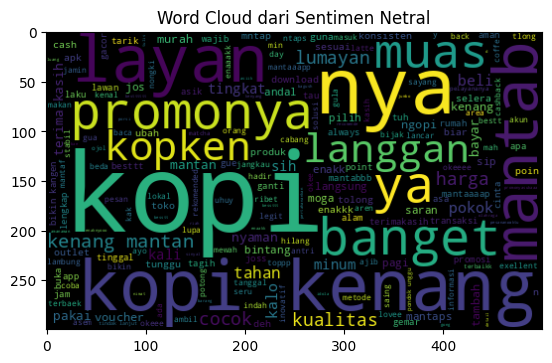

In [54]:
data_netral = data[data['sentimen'] == 'Netral']
all_words_netral = ' '.join([twts for twts in data_netral['content53']])
wordcloud_netral = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_netral)

plt.imshow(wordcloud_netral, interpolation="bilinear")
# plt.axis('off')
plt.title('Word Cloud dari Sentimen Netral')
plt.show()

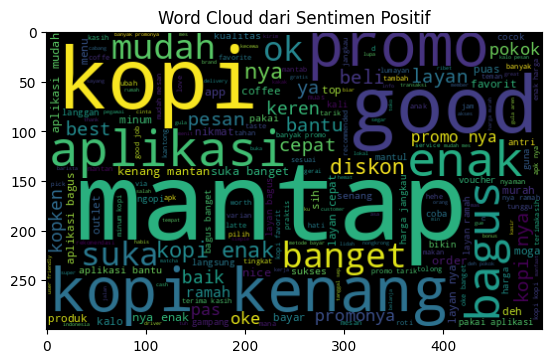

In [55]:
data_positif = data[data['sentimen'] == 'Positif']
all_words_positif = ' '.join([twts for twts in data_positif['content53']])
wordcloud_positif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_positif)

plt.imshow(wordcloud_positif, interpolation="bilinear")
# plt.axis('off')
plt.title('Word Cloud dari Sentimen Positif')
plt.show()

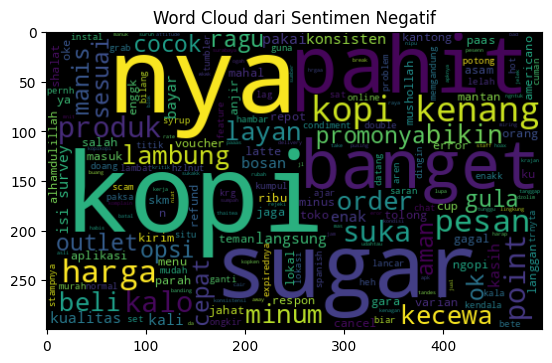

In [56]:
data_netral = data[data['sentimen'] == 'Negatif']
all_words_netral = ' '.join([twts for twts in data_netral['content53']])
wordcloud_netral = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_netral)

plt.imshow(wordcloud_netral, interpolation="bilinear")
# plt.axis('off')
plt.title('Word Cloud dari Sentimen Negatif')
plt.show()

<Axes: xlabel='sentimen', ylabel='count'>

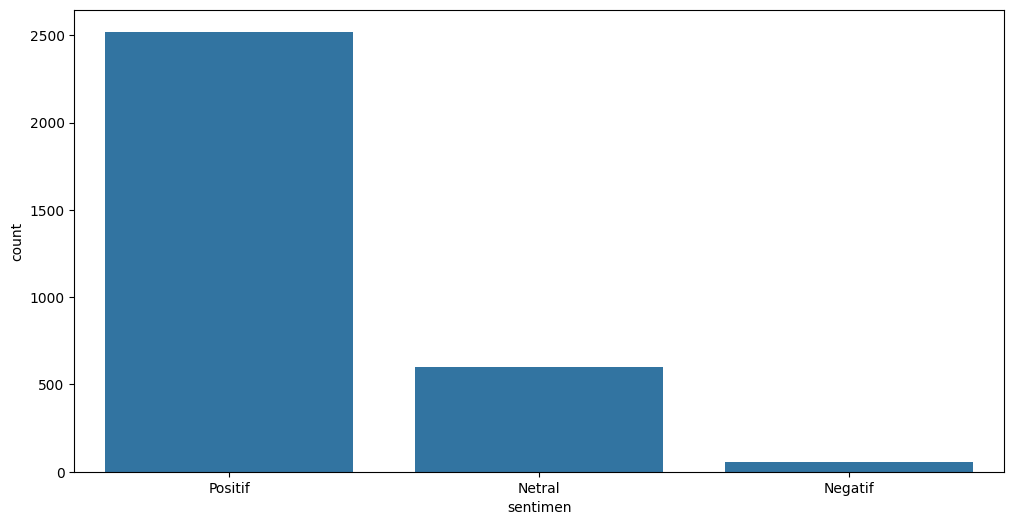

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentimen',data=data)

<Axes: xlabel='sentiment_label', ylabel='count'>

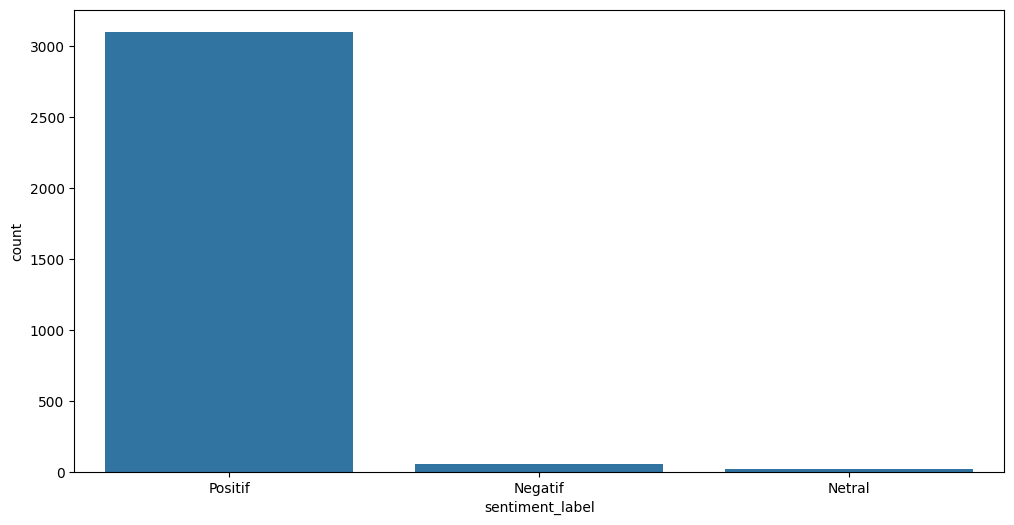

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment_label',data=data)

In [59]:
import nltk
from nltk.tokenize import word_tokenize

# Pastikan untuk mengunduh 'punkt' jika belum dilakukan
nltk.download('punkt')

# Gabungkan semua teks dalam 'content53' dan lakukan tokenisasi
all_text = ' '.join(data['content53'].dropna())  # Gabungkan semua teks menjadi satu string

# Tokenisasi teks untuk memecahnya menjadi kata
words = word_tokenize(all_text)

# Dapatkan kata unik dengan menggunakan set
unique_words = set(words)

# Tampilkan kata-kata unik
print(f"Total kata unik di content53: {len(unique_words)}")
print(list(unique_words))  # Menampilkan 20 kata pertama yang unik


Total kata unik di content53: 2115
['sukaaaaaaaaaaa', 'mantull', 'es', 'bangsa', 'nomor', 'kotos', 'guna', 'gede', 'derita', 'beans', 'played', 'colok', 'gurih', 'guud', 'sat', 'sumber', 'jumat', 'macha', 'kursi', 'lainhehe', 'mes', 'membantumempermudah', 'mind', 'alami', 'promosaran', 'kesini', 'diskonnyaa', 'frendly', 'padu', 'tetap', 'brew', 'murah', 'promonyamakasih', 'nce', 'promonyaaa', 'pajang', 'diperbaikki', 'terussss', 'manis', 'bikin', 'mantaaaaap', 'tuh', 'ubah', 'kupon', 'promk', 'sehat', 'fresh', 'laku', 'mantaaab', 'cacat', 'simpel', 'beast', 'bohong', 'saldo', 'wajib', 'ngeleg', 'paripurna', 'bukti', 'titip', 'perbanyakin', 'pelayananannya', 'musholla', 'xixixi', 'komen', 'franchise', 'perih', 'non', 'satu', 'mantulmamansentul', 'milknyaaaa', 'mantaaapp', 'daya', 'pegawai', 'kenyang', 'enyak', 'rama', 'rest', 'mangstaps', 'coffe', 'jaga', 'hrga', 'aplikatif', 'kendari', 'kopkenlumayan', 'cirengsaus', 'aga', 'pengin', 'fast', 'magic', 'kendala', 'rasany', 'syegerr', 'gua

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['sentimen'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((2541, 2102), (636, 2102))

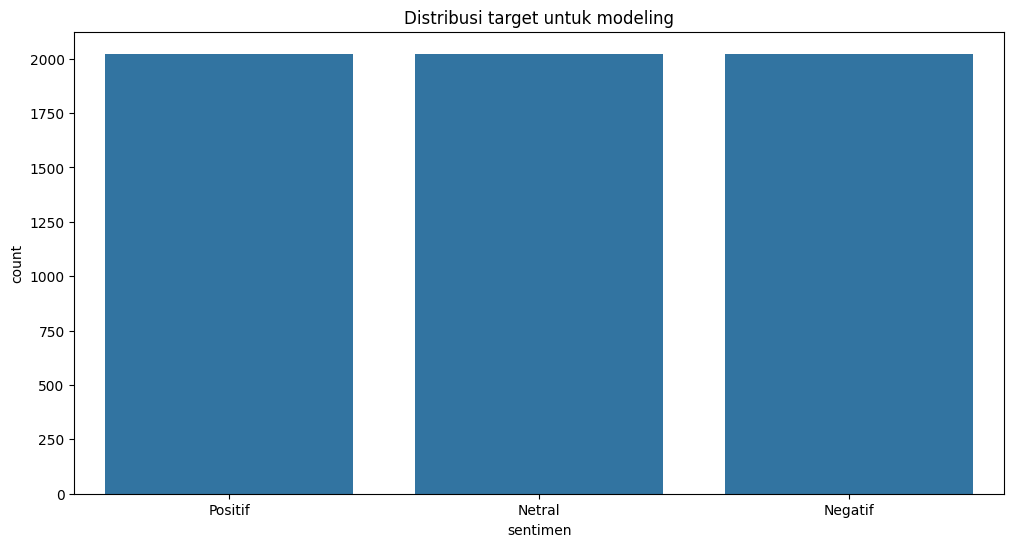

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Distribusi target untuk modeling')
plt.show()

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [63]:
# Import required libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize parameters for each model
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

nb_param_grid = {}  # Naive Bayes has no hyperparameters for RandomizedSearchCV

svm_param_grid = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf'],
                  'gamma': ['scale', 'auto']}

dt_param_grid = {'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Random Forest Model
rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_model.fit(X_train, y_train)

# Best Random Forest Parameters
print("\nBest Parameters for Random Forest:", rf_model.best_params_)

# Evaluate Random Forest
y_pred_rf = rf_model.best_estimator_.predict(X_test)
print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf))# SVM Model with RandomizedSearchCV
svm_model = RandomizedSearchCV(SVC(random_state=42), svm_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
svm_model.fit(X_train, y_train)

# Best SVM Parameters
print("\nBest Parameters for SVM:", svm_model.best_params_)

# Evaluate SVM
y_pred_svm = svm_model.best_estimator_.predict(X_test)
print("\n\nClassification Report for SVM (Tuned):")
print(classification_report(y_test, y_pred_svm))

# Decision Tree Model with RandomizedSearchCV
dt_model = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
dt_model.fit(X_train, y_train)

# Best Decision Tree Parameters
print("\nBest Parameters for Decision Tree:", dt_model.best_params_)

# Evaluate Decision Tree
y_pred_dt = dt_model.best_estimator_.predict(X_test)
print("\n\nClassification Report for Decision Tree (Tuned):")
print(classification_report(y_test, y_pred_dt))


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       0.50      0.06      0.11        17
      Netral       0.81      0.98      0.88       122
     Positif       0.98      0.96      0.97       497

    accuracy                           0.94       636
   macro avg       0.76      0.66      0.65       636
weighted avg       0.93      0.94      0.93       636


Best Parameters for SVM: {'kernel': 'linear', 'gamma': 'auto', 'C': 10}


Classification Report for SVM (Tuned):
              precision    recall  f1-score   support

     Negatif       0.67      0.24      0.35        17
      Netral       0.82      0.97      0.89       122
     Positif       0.98      0.96      0.97       497

    accuracy                           0.94       636
   macro avg       0.82      0.72      0.73       636
weig

In [64]:
from sklearn.model_selection import cross_val_score

# Random Forest Model
rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_model.fit(X_train, y_train)

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print("\nRandom Forest - Cross-validation Accuracy:", rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())


# SVM Model with RandomizedSearchCV
svm_model = RandomizedSearchCV(SVC(random_state=42), svm_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
svm_model.fit(X_train, y_train)

# Cross-validation for SVM
svm_cv_scores = cross_val_score(svm_model.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print("\nSVM - Cross-validation Accuracy:", svm_cv_scores)
print("Mean Accuracy:", svm_cv_scores.mean())

# Decision Tree Model with RandomizedSearchCV
dt_model = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
dt_model.fit(X_train, y_train)

# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_model.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print("\nDecision Tree - Cross-validation Accuracy:", dt_cv_scores)
print("Mean Accuracy:", dt_cv_scores.mean())



Random Forest - Cross-validation Accuracy: [0.97446458 0.97775947 0.97940692 0.99505766 0.99175598]
Mean Accuracy: 0.9836889219072351

SVM - Cross-validation Accuracy: [0.99011532 0.97775947 0.97693575 0.99093904 0.99093157]
Mean Accuracy: 0.9853362325493589

Decision Tree - Cross-validation Accuracy: [0.95140033 0.95634267 0.96705107 0.97364086 0.97032152]
Mean Accuracy: 0.9637512885530313


#SCORE

In [65]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['sentiment_label'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((2541, 2102), (636, 2102))

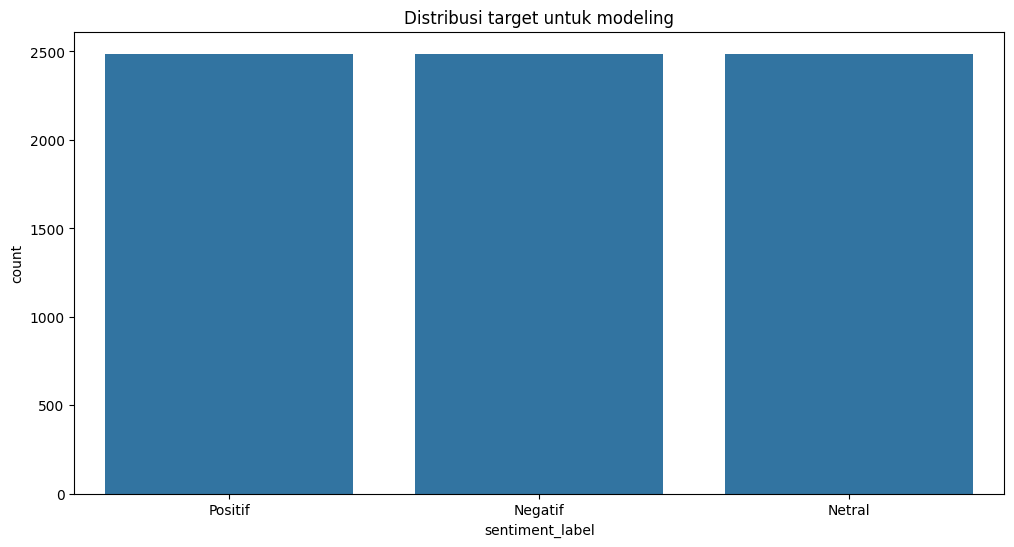

In [66]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Distribusi target untuk modeling')
plt.show()

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [68]:
# Import required libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize parameters for each model
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

nb_param_grid = {}  # Naive Bayes has no hyperparameters for RandomizedSearchCV

svm_param_grid = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf'],
                  'gamma': ['scale', 'auto']}

dt_param_grid = {'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Random Forest Model
rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_model.fit(X_train, y_train)

# Best Random Forest Parameters
print("\nBest Parameters for Random Forest:", rf_model.best_params_)

# Evaluate Random Forest
y_pred_rf = rf_model.best_estimator_.predict(X_test)
print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf))# SVM Model with RandomizedSearchCV
svm_model = RandomizedSearchCV(SVC(random_state=42), svm_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
svm_model.fit(X_train, y_train)

# Best SVM Parameters
print("\nBest Parameters for SVM:", svm_model.best_params_)

# Evaluate SVM
y_pred_svm = svm_model.best_estimator_.predict(X_test)
print("\n\nClassification Report for SVM (Tuned):")
print(classification_report(y_test, y_pred_svm))

# Decision Tree Model with RandomizedSearchCV
dt_model = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
dt_model.fit(X_train, y_train)

# Best Decision Tree Parameters
print("\nBest Parameters for Decision Tree:", dt_model.best_params_)

# Evaluate Decision Tree
y_pred_dt = dt_model.best_estimator_.predict(X_test)
print("\n\nClassification Report for Decision Tree (Tuned):")
print(classification_report(y_test, y_pred_dt))


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       1.00      0.08      0.14        13
      Netral       0.00      0.00      0.00         6
     Positif       0.97      1.00      0.99       617

    accuracy                           0.97       636
   macro avg       0.66      0.36      0.38       636
weighted avg       0.96      0.97      0.96       636



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Best Parameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


Classification Report for SVM (Tuned):
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        13
      Netral       0.00      0.00      0.00         6
     Positif       0.97      0.99      0.98       617

    accuracy                           0.96       636
   macro avg       0.32      0.33      0.33       636
weighted avg       0.94      0.96      0.95       636



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Best Parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30}


Classification Report for Decision Tree (Tuned):
              precision    recall  f1-score   support

     Negatif       0.35      0.46      0.40        13
      Netral       0.07      0.17      0.10         6
     Positif       0.98      0.96      0.97       617

    accuracy                           0.95       636
   macro avg       0.47      0.53      0.49       636
weighted avg       0.96      0.95      0.95       636

